## 01. 로지스틱 회귀 

- 선형 회귀(Linear Regression) + 시그모이드(Sigmoid) 함수를 조합한 모델!
- 목적 : 손실 함수 최소화 --> `경사 하강법` 활용 ! 
    - 시그모이드 함수 : 결과값을 0~1 사이의 확률(Probability)로 변환하여 `이진 분류`(Binary Classification)에 사용! --> (ex) 특성에 따른 물고기 종류가 도미인지 빙어인지 분류)
    - 소프트 맥스 함수 : `다중 분류`(여러개의 클래스를 가짐) --> ex) 특성의 따른 여러개의 물고기 종류 분류

In [1]:
import pandas as pd 
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [7]:
# 1. 훈련용, 채점용 만들기

fish_data = df[['Weight', 'Length2', 'Length3', 'Height', 'Width']]
fish_target = df[['Species']]

# fish_data

In [8]:
# 2. 훈련용, 채점용 넣고 섞어주기 

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target)

In [11]:
# 3. 특성 scale 확인 -> 무게 많이 차이남/길이 조금 차이남 -> 정규화 해주기

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#### 0. k-최근접 분류 -> 물고기 종류 분류만 해보기
- `from sklearn.neighbors import KNeighborsClassifier`

In [14]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(train_scaled, train_target)

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [16]:
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8319327731092437
0.775


In [18]:
kn.predict(test_scaled)

array(['Pike', 'Bream', 'Smelt', 'Parkki', 'Bream', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Bream', 'Roach', 'Perch', 'Pike',
       'Perch', 'Perch', 'Perch', 'Roach', 'Bream', 'Perch', 'Perch',
       'Smelt', 'Bream', 'Parkki', 'Perch', 'Bream', 'Parkki', 'Roach',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Bream', 'Bream', 'Perch', 'Pike'], dtype=object)

In [19]:
# 예측 확률 알아보기 

kn.predict_proba(test_scaled)

array([[0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0.8, 0. , 0. , 0.2, 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0. , 0.4, 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0.2, 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.4, 0. , 0.6, 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0.2],
       [0. , 0. , 0.6, 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0.4, 0. , 0.6, 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [1. , 0. , 0. , 0. , 0. ,

#### 1-1 로지스틱 회귀 (이진분류) 문제 - 'Weight', 'Length2', 'Length3', 'Height', 'Width'의 특성을 기준으로 도미인지 빙어인지 이진분류 하기
- `from sklearn.linear_model import LogisticRegression(C=20, max_iter = 1000)`
    - C (커질수록 규제가 작아짐)
    - max_iter (반복 정도) : 기본 100

In [22]:
# 1. 훈련 데이터셋에서 도미(Bream), 빙어(smelt)만 뽑아내기 

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

train_bs = train_scaled[bream_smelt_indexes['Species']]
target_bs = train_target[bream_smelt_indexes['Species']]

In [30]:
# 2. 로지스틱 회귀 함수 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(train_bs, target_bs)

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [35]:
#lr.predict(train_bs[:5])
lr.predict_proba(train_bs[:5])

array([[0.98560357, 0.01439643],
       [0.03400168, 0.96599832],
       [0.02977018, 0.97022982],
       [0.03567378, 0.96432622],
       [0.99783246, 0.00216754]])

#### 1-2 로지스틱 함수 (다중 분류) 문제 - 'Weight', 'Length2', 'Length3', 'Height', 'Width'의 특성을 기준으로 여러개의 물고기 종류 구분
 
- 여러개의 클래스 구분 (3개 이상)
    - 1) 소프트 맥스 함수 사용 : `LogisticRegression(multi_class='multinomial', solver='lbfgs')`
    - 2) OvR, (각 클래스를 하나 vs 나머지(0, 1) 이진 분류 문제로 변환):  `LogisticRegression(multi_class='ovr', solver='lbfgs')`
    - 3) 로지스틱 회귀

In [36]:
lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=20, max_iter=1000)

In [38]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.907563025210084
0.9


In [45]:
lr.predict(train_scaled[:5])

array(['Bream', 'Perch', 'Perch', 'Smelt', 'Perch'], dtype=object)

In [44]:
print(lr.predict_proba(test_scaled[:5]).round(3))          # ---> 7개의 종에 대해서 예측한 확률 / perch일 확률이 큼.

[[0.    0.    0.005 0.992 0.003 0.    0.   ]
 [0.976 0.001 0.    0.    0.    0.    0.023]
 [0.    0.001 0.021 0.    0.001 0.977 0.   ]
 [0.065 0.897 0.    0.    0.025 0.    0.012]
 [0.999 0.    0.    0.    0.    0.    0.001]]


In [46]:
lr.coef_.shape   # ---> 7개 행, 5개 열

(7, 5)

## 01-1 확률적 경사 하강법
- 정의 :  전체 샘플을 사용하지 않고 하나의 샘플을 훈련 세트에서 랜덤하게 고름 -> `전체 샘플을 사용할때까지`
- 목적 : **로지스틱 회귀의 최적화된 가중치를 찾아내기 위함.**
- 방법 : `from sklearn.linear_model import SGDClassifier`
    - 반복 돌린 상태에서 이어서 한번 더 돌리는 경우 : `sc.partial_fit` ---> 모든 샘플 세트 사용한 경우 : 에포크
    - `loss='log'` : 로지스틱 회귀 모델을 학습하는 과정이 됨 / `loss = 'log_loss'` : 다중 분류일 경우  클래스마다 이진 분류 모델을 만듦(도미 0, 나머지 1)

In [47]:
import pandas as pd 
df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [56]:
# 1. 훈련용, 채점용 만들기

fish_data = df[['Weight', 'Length2', 'Length3', 'Height', 'Width']]
fish_target = df[['Species']]

# fish_data

In [57]:
# 2. 훈련용, 채점용 넣고 섞어주기 

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(fish_data, fish_target)

In [58]:
# 3. 정규화 해주기

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [59]:
# 4. 로지스틱 회귀의 가중치를 최적화하기 위해 사용되는 최적화 기법 : SGD 

from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log_loss', max_iter = 100)                # --> 다중회귀, 100번 반복  

sc.fit(train_scaled, train_target)

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log_loss', max_iter=100)

In [63]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9327731092436975
0.75


### 반복을 돌린 상태에서 이어서 반복을 더 하고 싶은 경우 : `sc.partial_fit(train_scaled, train_target)`
- 에포크를 많이 돌린다고 성능이 좋아지지는 않음. --> 적절한 반복 횟수를 찾아야 함.

In [68]:
sc.partial_fit(train_scaled, train_target)

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log_loss', max_iter=100)

In [69]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9243697478991597
0.8


## 02. 결정 트리
- 직관적이고 설명에 용이한 모델 (yes or no로 정답을 찾는 알고리즘) -> 정규화 과정 (standard) 필요 없음.
- 정보이득(부모 노드와 자식 노드의 지니 불순도 차이)가 가능한 크도록 결정 트리를 성장시킴.
    - 가지치기 : 트리의 최대 깊이 지정 : `max_depth = 1` ---> 트리의 깊이(depth)가 깊어질수록 결정트리는 과적합되기 쉬워 예측 성능이 저하
    - 하이퍼파라미터 : 결정 트리의 다양한 매개변수 

####  'alcohol', 'residual sugar', 'pH'을 기준으로 레드(0), 화이트 와인(1) 이진분류하기

In [79]:
import pandas as pd
red_wine = pd.read_csv('data/winequality-red.csv', sep= ';')
#red_wine

white_wine = pd.read_csv('data/winequality-white.csv', sep= ';')
#white_wine

In [80]:
# 1. red_wine / white_wine의 필요 컬럼만 뽑기

red_wine = red_wine[['alcohol', 'residual sugar', 'pH']]
red_wine.rename(columns = {'residual sugar': 'sugar'}, inplace = True)
red_wine['class'] = 0

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0


In [81]:
white_wine = white_wine[['alcohol', 'residual sugar', 'pH']]
white_wine.rename(columns = {'residual sugar': 'sugar'}, inplace = True)
white_wine['class'] = 1

white_wine.head()

,alcohol,sugar,pH,class
0,8.8,20.7,3.00,1
1,9.5,1.6,3.30,1
2,10.1,6.9,3.26,1
3,9.9,8.5,3.19,1
4,9.9,8.5,3.19,1


In [84]:
# 2. 레드, 화이트 와인 데이터 프레임 합치기 : concat()

wine = pd.concat([red_wine, white_wine])
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0


In [90]:
# 3. 훈련, 채점용 만들기

data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]

In [91]:
# 4. 훈련용, 테스트용 넣고 섞어주기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(data, target)

In [97]:
# 5. 결정 트리 사용 ----> 로지스틱 회귀보다 직관적이고 설명하기 쉬움. (정규화 과정이 필요없음.)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 10)

dt.fit(train_input, train_target)

DecisionTreeClassifier(max_depth=10)

In [98]:
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))              # ---> 과대적합 발생 (가지치기 or max_depth 조정 필요)

0.930623973727422
0.8535384615384616


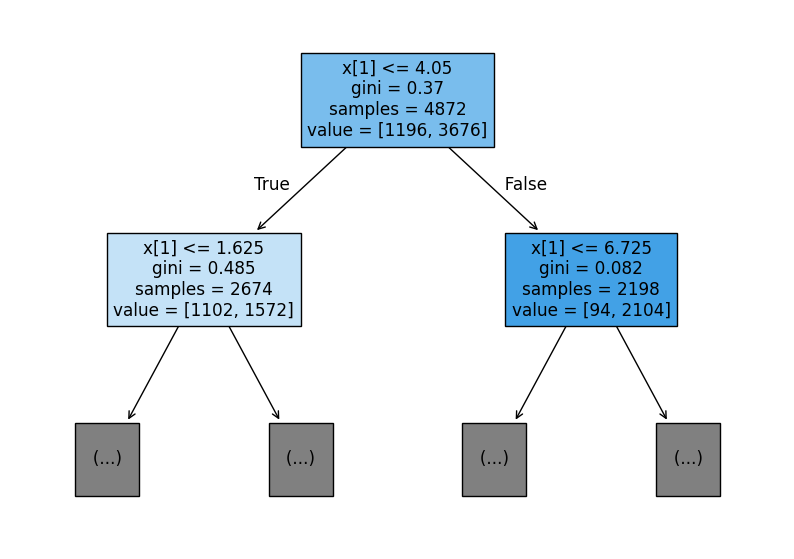

In [100]:
# 4. 결정 트리 시각화
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize = (10,7))            # 가로 10, 세로 7cm / 그림의 크기 지정
plot_tree(dt, max_depth =1, filled = True)             # 가지치기 : max_depth =1 : 앞부분에 있는 결정 트리만 보여줌. (첫번째 분할 트리만 확인할 수 있음.)
plt.show()                                             # filled = True (클래스의 색깔 부여 = 비율이 높아질 수록 진함.)      

#### 결정 트리 결과 해석 
- gini(불순도) : 순수노드 (지니 = 0)일수록 = 편향되게 나눌수록 잘 나눈것.
- sample(총 샘플 수) : 4872개
- value(클래스별 샘플 수) : 
    - 루트 노드에서 테스트 조건에 따라 왼쪽, 오른쪽 노드로 이동함. 

```
- 왼쪽 노드의 양성클래스(1) 화이트 와인의비율이 크게 줄어듦. --> 대부분의 화이트 와인은 오른쪽 노드로 이동함.
- 리프노드에서 가장 많은 클래스가 예측 클래스가 됨 --> 왼쪽, 오른쪽 모두 양성 클래스(1)가 더 많음.
```

### - 지니불순도 = (음성클래스 비율^2) + (양성클래스 비율^2)

In [104]:
1- ((1196/4872)**2 + (3676/4872)**2)       # 0에 가까우므로 지니불순도가 작다고 할 수 있음.

0.370443619381958

## 02-1 하이퍼파라미터 튜닝 

- 교차검증 : 하이퍼파라미터 튜닝 이전 과적합 방지, 모델 성능 활성화를 위해 할 필요 있음.
- 하이퍼파라미터 튜닝 : 모델 학습 전에 사용자가 직접 설정해야 하는 값을 조정하는 것 --> (모델의 성능 극대화 목적)
    - 그리드 서치 : 
    - 랜덤 서치 :

### 0) 검증 세트
- 테스트 세트로 평가 계속 -> 테스트 세트에 성능이 맞추게 되는 문제점 발생
- > 훈련세트를 훈련용(train), 검증용(sub, val)으로 나눔

In [105]:
import pandas as pd 

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [106]:
# 1. 훈련용, 테스트용 만들기 

data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]

In [107]:
# 2. train_test_split 두번 적용 (훈련세트, 검증세트 만들기)

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(data, target)

In [108]:
sub_input, val_input, sub_target, val_target = \
train_test_split(train_input, train_target)

In [110]:
print(train_input.shape)
print(sub_input.shape)
print(val_input.shape)

(4872, 3)
(3654, 3)
(1218, 3)


In [113]:
# 3. 결정 트리 -> 검증 세트 채점

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(sub_input, sub_target)

DecisionTreeClassifier()

In [114]:
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9975369458128078
0.8637110016420362


In [116]:
# 4. 테스트 세트 채점 

print(dt.score(test_input, test_target))

0.9981538461538462


### 0)-1 교차 검증 
- `from sklearn.model_selection import cross_validate`
- 목적 : 검증 폴드의 test_score의 scale 안정성 확인 --> 테스트 세트에만 맞춰진 것인지, 일반적으로 잘 작동하는지 확인할 수 있음.
    - 기본적으로 5-폴드 교차 검증 수행

In [117]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)          #fit, score_time : 각각 훈련, 검증 시간 의미 / test_score : 검증 폴드의 점수 = 80점대 중반으로 큰 변동성 없이 균일함 확인 
print(scores)

{'fit_time': array([0.01440954, 0.00890875, 0.00793099, 0.00877571, 0.00706458]), 'score_time': array([0.00552893, 0.00358438, 0.00336933, 0.00236678, 0.00292683]), 'test_score': array([0.83692308, 0.83076923, 0.85318275, 0.85523614, 0.86344969])}


### 1) 하이퍼파라미터 튜닝 - 그리드 서치
- 하이퍼파라미터 탐색 & 교차검증 한번에 수행 --> 별도로 교차검증 필요 없음
    - `from sklearn.model_selection import GridSearchCV`

In [118]:
from sklearn.model_selection import GridSearchCV
parms = {
    'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]         # 0.0001씩 증가하는 하이퍼파라미터 지정
}
gs = GridSearchCV(dt, parms, n_jobs = -1)           # n_jobs = -1 : 시스템에 있는 모든 값을 사용

In [119]:
gs.fit(train_input, train_target)          # best_estimator에 최적의 하이퍼파라미터값이 저장되어 자동으로 전체훈련세트에서 훈련함.

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [120]:
# 최적의 하이퍼파라미터 0.0003으로 지정하고 훈련된 것 바탕으로 채점
dt = gs.best_estimator_
print(gs.score(train_input, train_target))

0.910303776683087


### 2) 하이퍼파라미터 튜닝 - 랜덤 서치

- 매개변수의 값이 수치일때, 값의 범위 or 간격을 미리 정하기 어려울 때 사용
    - `from scipy.stats import uniform, randint` : uniform(실수), randint(정수)값 뽑기

In [123]:
from scipy.stats import uniform, randint 

In [124]:
# 1. 0~10범위 만들고, 10개 정수 샘플링
rgen = randint(0,10)
rgen.rvs(10)           #rvs = 확률분포에서 랜덤하게 값 샘플링

array([4, 9, 8, 1, 4, 2, 9, 7, 5, 2])

In [126]:
# 2. 0~1범위 만들고, 10개의 실수 샘플링
ugen = uniform(0,1)
ugen.rvs(10)

array([0.83499103, 0.67314522, 0.80198045, 0.52433675, 0.31662748,
       0.20643938, 0.53988309, 0.90533393, 0.52322884, 0.83933646])

In [127]:
# 3. 하이퍼 파라미터 지정
parms = {
    'min_impurity_decrease' : uniform(0.0001, 0.001),
    'max_depth': randint(20,50),
    'min_samples_split' : randint(2,25),
    'min_samples_leaf' : randint(1,25),             # 리프 노드가 가져야 하는 최소 샘플 수 : 크면 일반화 성능 향상됨.
}

In [129]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(), parms, n_iter = 100, n_jobs = -1)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001810D8965D0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001810D896E90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001810D6DF5C0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001810D6DF820>})

In [130]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.8969622331691297
